## Intial data stab...


## Visualizations

* Line graph with two lines, one for total ethanol consumed (sum) over time and another for average mortallity over time for one state and beverage type
* Heat map, average mortality rate by state
* Heat map, alcohol consumption by state
* Statistics, death type with the most correlation (alocohol consumption vs mortality rate)
* Outliers by state (gallons of ethanol for stat) *** Is there a way to identify which outliers are which states
* Correlations over years for mortality rate and ethanol consumption (Explore: All Beverages vs Different Beverage Types)

#### [Cardiovascular, Cirrhosis, Mental_substance abuse, Neurological]


In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
#create a dataframe from each excel sheet.

filepath = "Data Files/Cleaned Files/Copy of mort_cleaned.xlsx"

xls = pd.ExcelFile(filepath)
df_HIV_AIDS_tuberculosis = pd.read_excel(xls, 'HIV-AIDS & tuberculosis')
df_Diarrhea_lower_respiratory = pd.read_excel(xls,'Diarrhea, lower respiratory')
df_Neglected_tropical_diseases = pd.read_excel(xls,'Neglected tropical diseases')
df_Maternal_disorders = pd.read_excel(xls,'Maternal disorders')
df_Neonatal_disorders = pd.read_excel(xls,'Neonatal disorders')
df_Nutritional_deficiencies = pd.read_excel(xls, 'Nutritional deficiencies')
df_Other_communicable_maternal  = pd.read_excel(xls,'Other communicable_maternal')
df_Neoplasms = pd.read_excel(xls,'Neoplasms')
df_Cardiovascular_diseases = pd.read_excel(xls,'Cardiovascular diseases')
df_Chronic_respiratory_diseases = pd.read_excel(xls,'Chronic respiratory diseases')
df_Cirrhosis_other_chronic  = pd.read_excel(xls,'Cirrhosis & other chronic ')
df_Digestive_diseases = pd.read_excel(xls, 'Digestive diseases')
df_Neurological_disorders  = pd.read_excel(xls,'Neurological disorders')
df_Mental_substance_use  = pd.read_excel(xls,'Mental & substance use ')
df_Diabetes_urogenital_blood = pd.read_excel(xls,'Diabetes_urogenital_blood')
df_Musculoskeletal_disorders = pd.read_excel(xls,'Musculoskeletal disorders')
df_Other_non_communicable   = pd.read_excel(xls,'Other non-communicable ')
df_Transport_injuries = pd.read_excel(xls, 'Transport injuries')
df_Unintentional_injuries  = pd.read_excel(xls,'Unintentional injuries')
df_Self_harm_interpersonal   = pd.read_excel(xls,'Self-harm & interpersonal ')
df_Forces_of_nature_war_legal  = pd.read_excel(xls,'Forces of nature, war, & legal ')








In [3]:
#df_Forces_of_nature_war_legal.iloc[:,3].head
#df_Forces_of_nature_war_legal.rename(columns={"Mortality Rate, 1980*": "Mortality Rate"}, inplace = True)
#df_Forces_of_nature_war_legal.rename(columns = {df_Forces_of_nature_war_legal.columns[3]: 'col_1_new_name'}, inplace = True)
df_Forces_of_nature_war_legal.head()

,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"
0,United States,NaN,"0.26 (0.14, 0.49)","0.27 (0.15, 0.50)","0.23 (0.13, 0.42)","0.19 (0.11, 0.35)","0.20 (0.11, 0.38)","1.20 (0.37, 2.71)","0.23 (0.13, 0.43)","0.05 (0.02, 0.11)","-79.54 (-90.30, -61.40)"
1,Alabama,1.0,"0.42 (0.21, 0.90)","0.36 (0.19, 0.74)","0.32 (0.17, 0.67)","0.34 (0.18, 0.69)","0.47 (0.25, 0.93)","1.81 (0.42, 4.48)","0.39 (0.19, 0.79)","0.10 (0.04, 0.23)","-76.01 (-89.75, -49.01)"
2,"Autauga County, Alabama",1001.0,"0.30 (0.03, 1.31)","0.32 (0.05, 1.33)","0.27 (0.04, 0.98)","0.25 (0.03, 1.02)","0.23 (0.03, 0.88)","1.43 (0.11, 6.35)","0.31 (0.04, 1.21)","0.08 (0.01, 0.35)","-73.13 (-97.56, 190.32)"
3,"Baldwin County, Alabama",1003.0,"0.30 (0.05, 1.23)","0.29 (0.05, 1.02)","0.25 (0.04, 0.98)","0.18 (0.03, 0.69)","0.19 (0.03, 0.73)","1.07 (0.08, 4.36)","0.20 (0.03, 0.76)","0.05 (0.01, 0.18)","-84.84 (-98.16, 16.75)"
4,"Barbour County, Alabama",1005.0,"0.40 (0.05, 1.54)","0.41 (0.06, 1.59)","0.34 (0.04, 1.32)","0.29 (0.04, 1.20)","0.30 (0.04, 1.14)","1.70 (0.14, 6.78)","0.34 (0.04, 1.30)","0.09 (0.01, 0.44)","-77.34 (-97.78, 106.91)"


In [4]:
dfs = {0:df_HIV_AIDS_tuberculosis, 1:df_Diarrhea_lower_respiratory,
      2:df_Neglected_tropical_diseases,3:df_Maternal_disorders,4:df_Neonatal_disorders,
      5:df_Nutritional_deficiencies,6:df_Other_communicable_maternal,7:df_Neoplasms,
      8:df_Cardiovascular_diseases,9:df_Chronic_respiratory_diseases,10:df_Cirrhosis_other_chronic,
      11:df_Digestive_diseases,12:df_Neurological_disorders,13:df_Mental_substance_use,
      14:df_Diabetes_urogenital_blood,15:df_Musculoskeletal_disorders, 16:df_Other_non_communicable,
      17:df_Transport_injuries,18:df_Unintentional_injuries, 19:df_Self_harm_interpersonal,
      20:df_Forces_of_nature_war_legal}

list = [i for i in range(21)]
list_of_df = {0:'HIV_AIDS_tuberculosis',1:'Diarrhea_lower_respiratory',2:'Neglected_tropical_diseases',
             3:'Maternal_disorders',4:'Neonatal_disorders',5:'Nutritional_deficiencies',6:'Other_communicable_maternal',
             7:'Neoplasms',8:'Cardiovascular_diseases',9:'Chronic_respiratory_diseases',
             10:'Cirrhosis_other_chronic',11:'Digestive_diseases',12:'Neurological_disorders',
              13:'Mental_substance_use',14:'Diabetes_urogenital_blood',15:'Musculoskeletal_diorders',
             16:'Other_non_communicable',17:'Transport_injuries',18:'Unintentional_injuries',
             19:'Self_harm_interpersonal',20:'Forces_of_nature_war_legal'}


#Dictionary of Mortality df created 0- 20


In [5]:
filepath2 = "Data Files/Cleaned Files/NIH Data Alcohol Consumption.csv"
filepath3 = "Data Files/Cleaned Files/NIH Data FIPS.csv"
filepath4 = "Data Files/Cleaned Files/NIH Beverage Codes.csv"

df_nih = pd.read_csv(filepath2)
df_beverage_codes = pd.read_csv(filepath4)
df_fips_codes = pd.read_csv(filepath3)

df_nih['Gallons of ethanol per capita age 21 and older'] = df_nih['Gallons of ethanol per capita age 21 and older']/10000


In [6]:
df_nih.head()

,Year,FIPS,Type of beverage,Gallons of beverage,Gallons of ethanol,Population (14 and older),Gallons of ethanol per capita age 14 and older,Decile for per capita consumption age 14 and older,Population (21 and older),Gallons of ethanol per capita age 21 and older,Decile for per capita consumption age 21 and older,Type of data source,Time-varying alcohol by volume (ABV),Gallons of ethanol derived from time-varying ABV
0,1970,1,1,3863000,1738350,2499000,6956,9.0,2020000,0.8606,9.0,.,.,.
1,1970,1,2,1412000,225920,2499000,904,9.0,2020000,0.1118,9.0,.,.,.
2,1970,1,3,33098000,1489410,2499000,5960,10.0,2020000,0.7373,10.0,.,.,.
3,1970,1,4,.,3453680,2499000,13820,10.0,2020000,1.7097,10.0,.,.,.
4,1970,2,1,945000,425250,205000,20744,1.0,165000,2.5773,1.0,.,.,.


In [7]:
df_nih_merged = pd.merge(df_nih, df_beverage_codes, how="left", left_on = 'Type of beverage', right_on = 'Beverage ID')
df_nih_merged = pd.merge(df_nih_merged, df_fips_codes, how="left", left_on = 'FIPS', right_on = 'FIPS')

In [8]:
df_nih_merged.head()

,Year,FIPS,Type of beverage,Gallons of beverage,Gallons of ethanol,Population (14 and older),Gallons of ethanol per capita age 14 and older,Decile for per capita consumption age 14 and older,Population (21 and older),Gallons of ethanol per capita age 21 and older,Decile for per capita consumption age 21 and older,Type of data source,Time-varying alcohol by volume (ABV),Gallons of ethanol derived from time-varying ABV,Beverage ID,Beverage Type,State
0,1970,1,1,3863000,1738350,2499000,6956,9.0,2020000,0.8606,9.0,.,.,.,1,Spirits,Alabama
1,1970,1,2,1412000,225920,2499000,904,9.0,2020000,0.1118,9.0,.,.,.,2,Wine,Alabama
2,1970,1,3,33098000,1489410,2499000,5960,10.0,2020000,0.7373,10.0,.,.,.,3,Beer,Alabama
3,1970,1,4,.,3453680,2499000,13820,10.0,2020000,1.7097,10.0,.,.,.,4,All Beverages,Alabama
4,1970,2,1,945000,425250,205000,20744,1.0,165000,2.5773,1.0,.,.,.,1,Spirits,Alaska


In [9]:
# Create subsets for year

nih_1980 = df_nih_merged.loc[(df_nih_merged['Year'] == 1980) & (df_nih_merged['FIPS'] < 60)]
nih_1985 = df_nih_merged.loc[(df_nih_merged['Year'] == 1985) & (df_nih_merged['FIPS'] < 60)]
nih_1990 = df_nih_merged.loc[(df_nih_merged['Year'] == 1990) & (df_nih_merged['FIPS'] < 60)]
nih_1995 = df_nih_merged.loc[(df_nih_merged['Year'] == 1995) & (df_nih_merged['FIPS'] < 60)]
nih_2000 = df_nih_merged.loc[(df_nih_merged['Year'] == 2000) & (df_nih_merged['FIPS'] < 60)]
nih_2005 = df_nih_merged.loc[(df_nih_merged['Year'] == 2005) & (df_nih_merged['FIPS'] < 60)]
nih_2010 = df_nih_merged.loc[(df_nih_merged['Year'] == 2010) & (df_nih_merged['FIPS'] < 60)]
nih_2014 = df_nih_merged.loc[(df_nih_merged['Year'] == 2014) & (df_nih_merged['FIPS'] < 60)]

In [10]:
# Create dictionary of nih yearly dataframes...

nihs = {0:nih_1980,1:nih_1985,2:nih_1990,3:nih_1995,4:nih_2000,5:nih_2005,6:nih_2010,7:nih_2014}
nih_list = [i for i in range(8)]
when_list = [1980,1985,1990,1995,2000,2005,2010,2014]
print(nih_list)

[0, 1, 2, 3, 4, 5, 6, 7]


In [11]:
# Loop throguh mortality dfs and nih dfs all years.
i=0
j=0

when = []
mort_cat = []
cor_coeff = []
p_val =[]

for i in list:
    df_working_mort = pd.DataFrame(dfs[i])


    for j in nih_list:
       # print(f'Year {when_list[j]}  -------------------------{j}')

        df_working_nih = pd.DataFrame(nihs[j])

        df_states_working_mort = df_working_mort.loc[df_working_mort['FIPS']<60]
        nih_working_merged_working_mort = pd.merge(df_working_nih, df_states_working_mort, how = 'left', left_on = 'State', right_on = 'Location' )
        nih_working_merged_working_mort = nih_working_merged_working_mort[
                        ['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older',
                         'Mortality Rate, 1980*','Mortality Rate, 1985*','Mortality Rate, 1990*',
                         'Mortality Rate, 1995*','Mortality Rate, 2000*','Mortality Rate, 2005*',
                         'Mortality Rate, 2010*','Mortality Rate, 2014*','Location']]

        nih_working_merged_working_mort.columns.values[j+4] = "Mortality Rate"

        df_working_merged_working_mort = pd.merge(nih_working_merged_working_mort,df_beverage_codes, how='left', left_on ='Type of beverage', right_on = 'Beverage ID')

        working_merged_clean = df_working_merged_working_mort['Mortality Rate'].str.split(' ').str.get(0).astype(float)
        df_working_merged_working_mort['Mortality Rate'] = working_merged_clean

        df_working_merged_working4 = df_working_merged_working_mort.loc[df_working_merged_working_mort['Beverage ID'] == 4]
        df_working_merged_working4.dropna(inplace=True)

        x_values4 = df_working_merged_working4['Gallons of ethanol per capita age 21 and older']
        y_values4 = df_working_merged_working4['Mortality Rate']

        corr4= st.pearsonr(x_values4,y_values4)
        if corr4[1] < 0.05:
           # print(f'the correlation for {list_of_df[i]} in {when_list[j]} is {corr4}')
           # significant_list.append({'Year':when_list[j],'Mortality Category':list_of_df[i],'Correlation Coeff':corr4[0],'P-Value':corr4[1]}, ignore_index=True)
            when.append(when_list[j])
            mort_cat.append(list_of_df[i])
            cor_coeff.append(corr4[0])
            p_val.append(corr4[1])
            
        #nih_working_merged_working_mort.rename(columns = {nih_working_merged_working_mort.columns[j+2]: 'Done'}, inplace = True)

tab = pd.DataFrame({'Year':when,'Mortality Category':mort_cat,'Correlation Coeff':cor_coeff,'P-Value':p_val})
tab_sorted = tab.sort_values(by=['Correlation Coeff'], ascending = False)
tab_sorted



C:\Users\Walte\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Year,Mortality Category,Correlation Coeff,P-Value
21,1985,Cirrhosis_other_chronic,0.556331,0.000033
20,1980,Cirrhosis_other_chronic,0.511770,0.000171
22,1990,Cirrhosis_other_chronic,0.506808,0.000202
29,1990,Mental_substance_use,0.500127,0.000253
28,1985,Mental_substance_use,0.487136,0.000386
23,1995,Cirrhosis_other_chronic,0.428749,0.002114
30,1995,Mental_substance_use,0.397301,0.004703
18,1980,Chronic_respiratory_diseases,0.395368,0.004928
27,1980,Mental_substance_use,0.378977,0.007246
24,2000,Cirrhosis_other_chronic,0.360974,0.010830


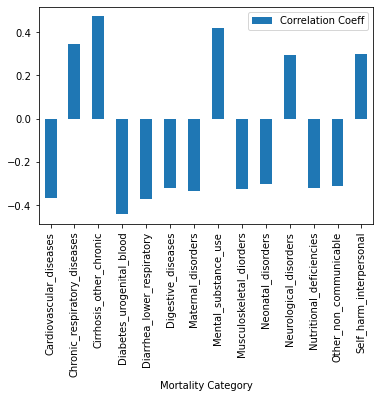

In [12]:
Mort_cat_groups_mean = tab.groupby(['Mortality Category']).mean()
Mort_cat_groups_mean.plot(kind = 'bar',y='Correlation Coeff')

In [13]:
# Get States Data from Substance Abuse DataFrame
#df_states_mental_substance_use = df_Mental_substance_use.loc[df_Mental_substance_use['FIPS'] < 60]
df_states_Cirrhosis_other_chronic = df_Cirrhosis_other_chronic.loc[df_Cirrhosis_other_chronic['FIPS'] < 60]

In [14]:
df_states_Cirrhosis_other_chronic.head()

,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"
1,Alabama,1.0,"17.65 (16.40, 18.75)","17.30 (16.19, 18.24)","16.58 (15.76, 17.44)","16.54 (15.80, 17.34)","17.19 (16.21, 17.98)","19.44 (17.45, 20.31)","21.01 (17.85, 22.09)","21.76 (18.43, 23.04)","23.30 (5.65, 34.91)"
69,Alaska,2.0,"20.57 (17.61, 23.84)","19.20 (16.72, 21.66)","17.89 (16.02, 20.19)","17.00 (15.32, 18.91)","17.18 (15.57, 18.82)","18.44 (16.48, 20.30)","19.51 (16.91, 21.58)","20.17 (17.36, 22.60)","-1.93 (-21.24, 21.32)"
99,Arizona,4.0,"21.99 (20.04, 23.54)","20.80 (19.11, 22.35)","19.33 (18.13, 20.53)","18.54 (17.54, 19.68)","18.84 (17.81, 19.88)","20.59 (18.43, 21.68)","20.42 (17.55, 21.53)","20.94 (17.83, 22.29)","-4.80 (-16.84, 5.00)"
115,Arkansas,5.0,"15.07 (13.75, 16.01)","14.80 (13.90, 15.66)","14.38 (13.71, 15.16)","14.33 (13.68, 15.10)","14.91 (14.12, 15.59)","16.83 (15.21, 17.62)","18.34 (15.76, 19.35)","18.94 (16.07, 20.15)","25.66 (8.77, 38.70)"
191,California,6.0,"24.09 (22.18, 25.31)","21.76 (20.24, 22.77)","19.31 (18.49, 20.05)","16.99 (16.30, 17.91)","16.46 (15.80, 17.10)","17.08 (15.45, 17.71)","17.34 (14.76, 18.11)","16.87 (14.16, 17.79)","-29.97 (-39.29, -23.53)"


In [15]:
# Create new dataframe for cirrhosis for each year

nih_1980_merged_cirrhosis = pd.merge(nih_1980, df_states_Cirrhosis_other_chronic, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1985_merged_cirrhosis = pd.merge(nih_1985, df_states_Cirrhosis_other_chronic, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1990_merged_cirrhosis = pd.merge(nih_1990, df_states_Cirrhosis_other_chronic, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1995_merged_cirrhosis = pd.merge(nih_1995, df_states_Cirrhosis_other_chronic, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2000_merged_cirrhosis = pd.merge(nih_2000, df_states_Cirrhosis_other_chronic, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2005_merged_cirrhosis = pd.merge(nih_2005, df_states_Cirrhosis_other_chronic, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2010_merged_cirrhosis = pd.merge(nih_2010, df_states_Cirrhosis_other_chronic, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2014_merged_cirrhosis = pd.merge(nih_2014, df_states_Cirrhosis_other_chronic, how = 'left', left_on = 'State', right_on = 'Location' )

In [16]:
# Grab only needed columns (don't forget to change year number in Mortality Rate column)
nih_1980_merged_cirrhosis = nih_1980_merged_cirrhosis[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1980*','Location']]
nih_1985_merged_cirrhosis = nih_1985_merged_cirrhosis[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1985*','Location']]
nih_1990_merged_cirrhosis = nih_1990_merged_cirrhosis[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1990*','Location']]
nih_1995_merged_cirrhosis = nih_1995_merged_cirrhosis[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1995*','Location']]
nih_2000_merged_cirrhosis = nih_2000_merged_cirrhosis[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2000*','Location']]
nih_2005_merged_cirrhosis = nih_2005_merged_cirrhosis[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2005*','Location']]
nih_2010_merged_cirrhosis = nih_2010_merged_cirrhosis[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2010*','Location']]
nih_2014_merged_cirrhosis = nih_2014_merged_cirrhosis[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2014*','Location']]

In [17]:
# Rename Mortality Rate column
nih_1980_merged_cirrhosis.rename(columns={"Mortality Rate, 1980*": "Mortality Rate"}, inplace = True)
nih_1985_merged_cirrhosis.rename(columns={"Mortality Rate, 1985*": "Mortality Rate"}, inplace = True)
nih_1990_merged_cirrhosis.rename(columns={"Mortality Rate, 1990*": "Mortality Rate"}, inplace = True)
nih_1995_merged_cirrhosis.rename(columns={"Mortality Rate, 1995*": "Mortality Rate"}, inplace = True)
nih_2000_merged_cirrhosis.rename(columns={"Mortality Rate, 2000*": "Mortality Rate"}, inplace = True)
nih_2005_merged_cirrhosis.rename(columns={"Mortality Rate, 2005*": "Mortality Rate"}, inplace = True)
nih_2010_merged_cirrhosis.rename(columns={"Mortality Rate, 2010*": "Mortality Rate"}, inplace = True)
nih_2014_merged_cirrhosis.rename(columns={"Mortality Rate, 2014*": "Mortality Rate"}, inplace = True)

In [18]:

# Concatenate all year dataframes
frames_cirrhosis = [nih_1980_merged_cirrhosis, 
                    nih_1985_merged_cirrhosis,
                    nih_1990_merged_cirrhosis,
                    nih_1995_merged_cirrhosis,
                    nih_2000_merged_cirrhosis,
                    nih_2005_merged_cirrhosis,
                    nih_2010_merged_cirrhosis,
                    nih_2014_merged_cirrhosis]

df_concat_cirrhosis = pd.concat(frames_cirrhosis)

df_concat_cirrhosis

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location
0,1980,1,1,0.8959,"17.65 (16.40, 18.75)",Alabama
1,1980,1,2,0.1960,"17.65 (16.40, 18.75)",Alabama
2,1980,1,3,1.1504,"17.65 (16.40, 18.75)",Alabama
3,1980,1,4,2.2423,"17.65 (16.40, 18.75)",Alabama
4,1980,2,1,2.0345,"20.57 (17.61, 23.84)",Alaska
...,...,...,...,...,...,...
199,2014,55,4,3.3634,"13.51 (11.49, 14.27)",Wisconsin
200,2014,56,1,1.3061,"21.73 (18.82, 23.50)",Wyoming
201,2014,56,2,0.3460,"21.73 (18.82, 23.50)",Wyoming
202,2014,56,3,1.4129,"21.73 (18.82, 23.50)",Wyoming


In [19]:
df_concat_cirrhosis = pd.merge(df_concat_cirrhosis,df_beverage_codes, how='left', left_on ='Type of beverage', right_on = 'Beverage ID')

In [20]:
df_concat_cirrhosis_clean = df_concat_cirrhosis['Mortality Rate'].str.split(' ').str.get(0).astype(float)

In [21]:
df_concat_cirrhosis['Mortality Rate'] = df_concat_cirrhosis_clean

In [22]:
df_concat_cirrhosis

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location,Beverage ID,Beverage Type
0,1980,1,1,0.8959,17.65,Alabama,1,Spirits
1,1980,1,2,0.1960,17.65,Alabama,2,Wine
2,1980,1,3,1.1504,17.65,Alabama,3,Beer
3,1980,1,4,2.2423,17.65,Alabama,4,All Beverages
4,1980,2,1,2.0345,20.57,Alaska,1,Spirits
...,...,...,...,...,...,...,...,...
1627,2014,55,4,3.3634,13.51,Wisconsin,4,All Beverages
1628,2014,56,1,1.3061,21.73,Wyoming,1,Spirits
1629,2014,56,2,0.3460,21.73,Wyoming,2,Wine
1630,2014,56,3,1.4129,21.73,Wyoming,3,Beer


In [23]:
# Isolate rows for all beverages
df_concat_cirrhosis4 = df_concat_cirrhosis.loc[df_concat_cirrhosis['Beverage ID'] == 4]
df_concat_cirrhosis1 = df_concat_cirrhosis.loc[df_concat_cirrhosis['Beverage ID'] == 1]
df_concat_cirrhosis2 = df_concat_cirrhosis.loc[df_concat_cirrhosis['Beverage ID'] == 2]
df_concat_cirrhosis3 = df_concat_cirrhosis.loc[df_concat_cirrhosis['Beverage ID'] == 3]


In [24]:
df_concat_cirrhosis4.describe()

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Beverage ID
count,408.00000,408.000000,408.0,408.000000,392.000000,408.0
mean,1997.37500,28.960784,4.0,2.849246,16.628316,4.0
std,11.28257,15.696083,0.0,0.729356,3.166775,0.0
min,1980.00000,1.000000,4.0,1.473000,10.160000,4.0
25%,1988.75000,16.000000,4.0,2.393375,14.580000,4.0
50%,1997.50000,29.000000,4.0,2.694700,16.180000,4.0
75%,2006.25000,42.000000,4.0,3.115325,18.287500,4.0
max,2014.00000,56.000000,4.0,6.772300,31.820000,4.0


In [25]:
# Remove nulls

df_concat_cirrhosis4.dropna(inplace=True)
df_concat_cirrhosis1.dropna(inplace=True)
df_concat_cirrhosis2.dropna(inplace=True)
df_concat_cirrhosis3.dropna(inplace=True)

C:\Users\Walte\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Walte\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Walte\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [26]:
df_concat_cirrhosis4.describe()

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Beverage ID
count,392.000000,392.000000,392.0,392.000000,392.000000,392.0
mean,1997.375000,29.244898,4.0,2.765887,16.628316,4.0
std,11.283135,15.793463,0.0,0.599271,3.166775,0.0
min,1980.000000,1.000000,4.0,1.473000,10.160000,4.0
25%,1988.750000,17.000000,4.0,2.382500,14.580000,4.0
50%,1997.500000,29.000000,4.0,2.676500,16.180000,4.0
75%,2006.250000,42.000000,4.0,3.059825,18.287500,4.0
max,2014.000000,56.000000,4.0,6.772300,31.820000,4.0


In [27]:
df_concat_cirrhosis2

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location,Beverage ID,Beverage Type
1,1980,1,2,0.1960,17.65,Alabama,2,Wine
5,1980,2,2,0.6036,20.57,Alaska,2,Wine
9,1980,4,2,0.4277,21.99,Arizona,2,Wine
13,1980,5,2,0.1464,15.07,Arkansas,2,Wine
17,1980,6,2,0.8406,24.09,California,2,Wine
...,...,...,...,...,...,...,...,...
1613,2014,51,2,0.5323,15.00,Virginia,2,Wine
1617,2014,53,2,0.5924,16.65,Washington,2,Wine
1621,2014,54,2,0.1086,21.24,West Virginia,2,Wine
1625,2014,55,2,0.4269,13.51,Wisconsin,2,Wine


In [28]:
x_values4 = df_concat_cirrhosis4['Gallons of ethanol per capita age 21 and older']
y_values4 = df_concat_cirrhosis4['Mortality Rate']

x_values1 = df_concat_cirrhosis1['Gallons of ethanol per capita age 21 and older']
y_values1 = df_concat_cirrhosis1['Mortality Rate']

x_values2 = df_concat_cirrhosis2['Gallons of ethanol per capita age 21 and older']
y_values2 = df_concat_cirrhosis2['Mortality Rate']

x_values3 = df_concat_cirrhosis3['Gallons of ethanol per capita age 21 and older']
y_values3 = df_concat_cirrhosis3['Mortality Rate']

Text(0, 0.5, 'Mortality Rate- Cirrhosis')

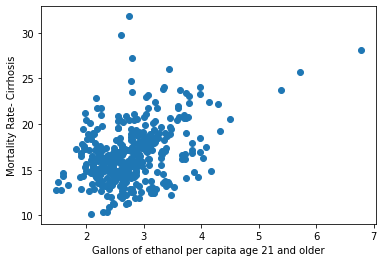

In [29]:
plt.scatter(x_values4,y_values4)
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate- Cirrhosis')

In [30]:
# Calculate correlation

corr4= st.pearsonr(x_values4,y_values4)
corr1= st.pearsonr(x_values1,y_values1)
corr2= st.pearsonr(x_values2,y_values2)
corr3= st.pearsonr(x_values3,y_values3)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values4, y_values4)
regress_values4 = x_values4 * slope + intercept
line_eq2 = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))




print(f"The correlation between ethanol consumption and mortality rate for all beverages is {corr4}")
print(f"The correlation between ethanol consumption and mortality rate for spirits is {corr1}")
print(f"The correlation between ethanol consumption and mortality rate for wine is {corr2}")
print(f"The correlation between ethanol consumption and mortality rate for beer is {corr3}")

The correlation between ethanol consumption and mortality rate for all beverages is (0.3856673466932369, 2.376810627975493e-15)
The correlation between ethanol consumption and mortality rate for spirits is (0.3876143904924144, 1.674785489706126e-15)
The correlation between ethanol consumption and mortality rate for wine is (0.22874072543747365, 4.75830495493144e-06)
The correlation between ethanol consumption and mortality rate for beer is (0.25637423974022533, 2.6610092353127123e-07)


Text(0, 0.5, 'Mortality Rate')

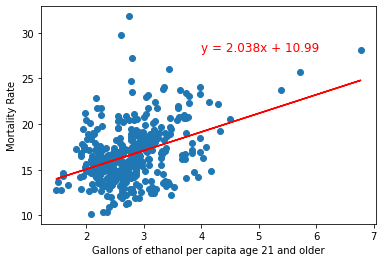

In [31]:
plt.scatter(x_values4,y_values4)
plt.plot(x_values4,regress_values4,"r-")
plt.annotate(line_eq2,(4,28),fontsize=12,color="red")
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate')

In [32]:
# Outliers

df_concat_cirrhosis4_1980 = df_concat_cirrhosis4.loc[df_concat_cirrhosis4['Year'] == 1980]
df_concat_cirrhosis4_1985 = df_concat_cirrhosis4.loc[df_concat_cirrhosis4['Year'] == 1985]
df_concat_cirrhosis4_1990 = df_concat_cirrhosis4.loc[df_concat_cirrhosis4['Year'] == 1990]
df_concat_cirrhosis4_1995 = df_concat_cirrhosis4.loc[df_concat_cirrhosis4['Year'] == 1995]
df_concat_cirrhosis4_2000 = df_concat_cirrhosis4.loc[df_concat_cirrhosis4['Year'] == 2000]
df_concat_cirrhosis4_2005 = df_concat_cirrhosis4.loc[df_concat_cirrhosis4['Year'] == 2005]
df_concat_cirrhosis4_2010 = df_concat_cirrhosis4.loc[df_concat_cirrhosis4['Year'] == 2010]
df_concat_cirrhosis4_2014 = df_concat_cirrhosis4.loc[df_concat_cirrhosis4['Year'] == 2014]

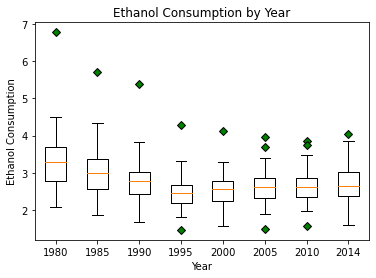

In [33]:
data_by_year4 = [df_concat_cirrhosis4_1980['Gallons of ethanol per capita age 21 and older'], 
                df_concat_cirrhosis4_1985['Gallons of ethanol per capita age 21 and older'],
                df_concat_cirrhosis4_1990['Gallons of ethanol per capita age 21 and older'],
                df_concat_cirrhosis4_1995['Gallons of ethanol per capita age 21 and older'],
                df_concat_cirrhosis4_2000['Gallons of ethanol per capita age 21 and older'],
                df_concat_cirrhosis4_2005['Gallons of ethanol per capita age 21 and older'],
                df_concat_cirrhosis4_2010['Gallons of ethanol per capita age 21 and older'],
                df_concat_cirrhosis4_2014['Gallons of ethanol per capita age 21 and older']]

year_labels = ['1980','1985','1990','1995','2000','2005','2010','2014']

# Format outlier marker
green_format = dict(markerfacecolor='g', marker='D')

# Plot the data
fig, ax = plt.subplots()
ax.set_title('Ethanol Consumption by Year')
ax.set_ylabel('Ethanol Consumption')
ax.set_xlabel('Year')
ax.boxplot(data_by_year4, flierprops=green_format, labels=year_labels)

plt.show()

In [34]:
year_labels = ['1980','1985','1990','1995','2000','2005','2010','2014']


# Create empty list to fill with tumor vol data (for plotting)
ethanol_list4 = []
outliers_list4 = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for year in year_labels:
    
    # Locate the rows for each year
    
    ethanol_consumption = df_concat_cirrhosis4.loc[(df_concat_cirrhosis4['Year'] == year)]
    ethanol_consumption = df_concat_cirrhosis4.iloc[:,3]

    
    # Get upper and lower bounds

    quartiles = ethanol_consumption.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Add subset to ethanol list  and state list
    
    ethanol_consumption = pd.DataFrame(ethanol_consumption)
    ethanol_list4.append(ethanol_consumption)    
    
    # Determine outliers using upper and lower bounds
    
    outliers4 = ethanol_consumption.loc[(ethanol_consumption['Gallons of ethanol per capita age 21 and older'] > upper_bound) | (ethanol_consumption['Gallons of ethanol per capita age 21 and older'] < lower_bound)]
    outliers4 = outliers4.squeeze()
    outliers_list4.append(outliers4)    

    # Print results
    
    print(f"{year}'s lower bound is: {lower_bound}.")
    print(f"{year}'s upper bound is: {upper_bound}.")
    print(f"{year}'s potential outliers are: {outliers4}")
    print("---------------------------------------------------")

1980's lower bound is: 1.3665124999999996.
1980's upper bound is: 4.0758125000000005.
1980's potential outliers are: 7      4.4974
115    6.7723
199    4.1758
203    4.0846
211    4.3293
319    5.7109
523    5.3868
727    4.2953
931    4.1366
Name: Gallons of ethanol per capita age 21 and older, dtype: float64
---------------------------------------------------
1985's lower bound is: 1.3665124999999996.
1985's upper bound is: 4.0758125000000005.
1985's potential outliers are: 7      4.4974
115    6.7723
199    4.1758
203    4.0846
211    4.3293
319    5.7109
523    5.3868
727    4.2953
931    4.1366
Name: Gallons of ethanol per capita age 21 and older, dtype: float64
---------------------------------------------------
1990's lower bound is: 1.3665124999999996.
1990's upper bound is: 4.0758125000000005.
1990's potential outliers are: 7      4.4974
115    6.7723
199    4.1758
203    4.0846
211    4.3293
319    5.7109
523    5.3868
727    4.2953
931    4.1366
Name: Gallons of ethanol per 

C:\Users\Walte\.conda\envs\PythonData\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [35]:
# Create a groupby for Year
cirrhosis4_year_group = df_concat_cirrhosis4.groupby('Year')


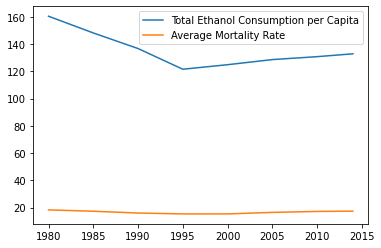

In [36]:
# Plotting line graph
sum_ethanol4 = pd.DataFrame(cirrhosis4_year_group["Gallons of ethanol per capita age 21 and older"].sum()).reset_index()
avg_mortality4 = pd.DataFrame(cirrhosis4_year_group["Mortality Rate"].mean()).reset_index()


plt.plot(sum_ethanol4['Year'], sum_ethanol4['Gallons of ethanol per capita age 21 and older'], label = "Total Ethanol Consumption per Capita")
plt.plot(avg_mortality4['Year'], avg_mortality4['Mortality Rate'], label = "Average Mortality Rate")
plt.legend()
plt.show()


In [39]:


st.f_oneway(df_concat_cirrhosis4_1980['Gallons of ethanol per capita age 21 and older'], 
                df_concat_cirrhosis4_1985['Gallons of ethanol per capita age 21 and older'],
                df_concat_cirrhosis4_1990['Gallons of ethanol per capita age 21 and older'],
                df_concat_cirrhosis4_1995['Gallons of ethanol per capita age 21 and older'],
                df_concat_cirrhosis4_2000['Gallons of ethanol per capita age 21 and older'],
                df_concat_cirrhosis4_2005['Gallons of ethanol per capita age 21 and older'],
                df_concat_cirrhosis4_2010['Gallons of ethanol per capita age 21 and older'],
                df_concat_cirrhosis4_2014['Gallons of ethanol per capita age 21 and older'])
#stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=11.235218131897957, pvalue=5.806917724821803e-13)